In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from datetime import datetime
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay


In [11]:
!pip install openpyxl
from openpyxl import load_workbook

In [12]:
wb = load_workbook(filename = '/content/AirQualityUCI.xlsx')
sheetnames = wb.sheetnames

n=len(sheetnames)
print(n)

1


In [13]:
df_base = pd.read_excel('/content/AirQualityUCI.xlsx', sheet_name=list(range(n)))

for i in range(1,n):
    df_base[i] = df.DataFrame(df_base[i].values[1:], columns=df[i].iloc[0])

df_base[0].head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [14]:
df_base = df_base[0]
df = df_base.drop(columns=['CO(GT)', 'NMHC(GT)', 'C6H6(GT)','NO2(GT)'])
df.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.00,1045.50,166.0,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,1292.25,954.75,103.0,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,1402.00,939.25,131.0,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,1375.50,948.25,172.0,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1272.25,835.50,131.0,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [15]:
df.insert(0, 'DateTime',0)
df['DateTime'] =  df[['Date', 'Time']].astype(str).agg(' '.join, axis=1)
df.drop(['Date','Time'], axis=1, inplace=True)
df.head()

,DateTime,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,1360.00,1045.50,166.0,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,1292.25,954.75,103.0,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,1402.00,939.25,131.0,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,1375.50,948.25,172.0,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1272.25,835.50,131.0,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [16]:
df['PT08.S1(CO)'].replace(-200, np.nan, inplace=True)
df['PT08.S2(NMHC)'].replace(-200, np.nan, inplace=True)
df['PT08.S3(NOx)'].replace(-200, np.nan, inplace=True)
df['PT08.S4(NO2)'].replace(-200, np.nan, inplace=True)
df['PT08.S5(O3)'].replace(-200, np.nan, inplace=True)
df['NOx(GT)'].replace(-200, np.nan, inplace=True)
df['T'].replace(-200, np.nan, inplace=True)
df['RH'].replace(-200, np.nan, inplace=True)
df['AH'].replace(-200, np.nan, inplace=True)

In [17]:
tmp =df.copy()


In [18]:
df.iloc[[1825]]

,DateTime,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1825,2004-05-25 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.interpolate(method='polynomial', limit_direction='forward', order=3, inplace=True)

In [20]:
df.iloc[[1825]]


,DateTime,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1825,2004-05-25 19:00:00,1501.423744,1746.746925,207.054367,568.235286,2188.656085,1758.90229,26.619101,15.327229,0.51018


In [21]:
def raw_visualization(df, cols=2, rows=5):
    td = df['DateTime']
    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(22,30), dpi=100, facecolor='w', edgecolor='k'
    )
    for name, data in df.items():
        data.index = td
        idx = df.columns.get_loc(name)-1
        if idx < 0:
            continue
        ax = data[300:900].plot(
            ax = axes[idx//2, idx%2],
            color=np.random.rand(3,),
            title=f'{name}',
            rot=25,
        )

    plt.tight_layout()

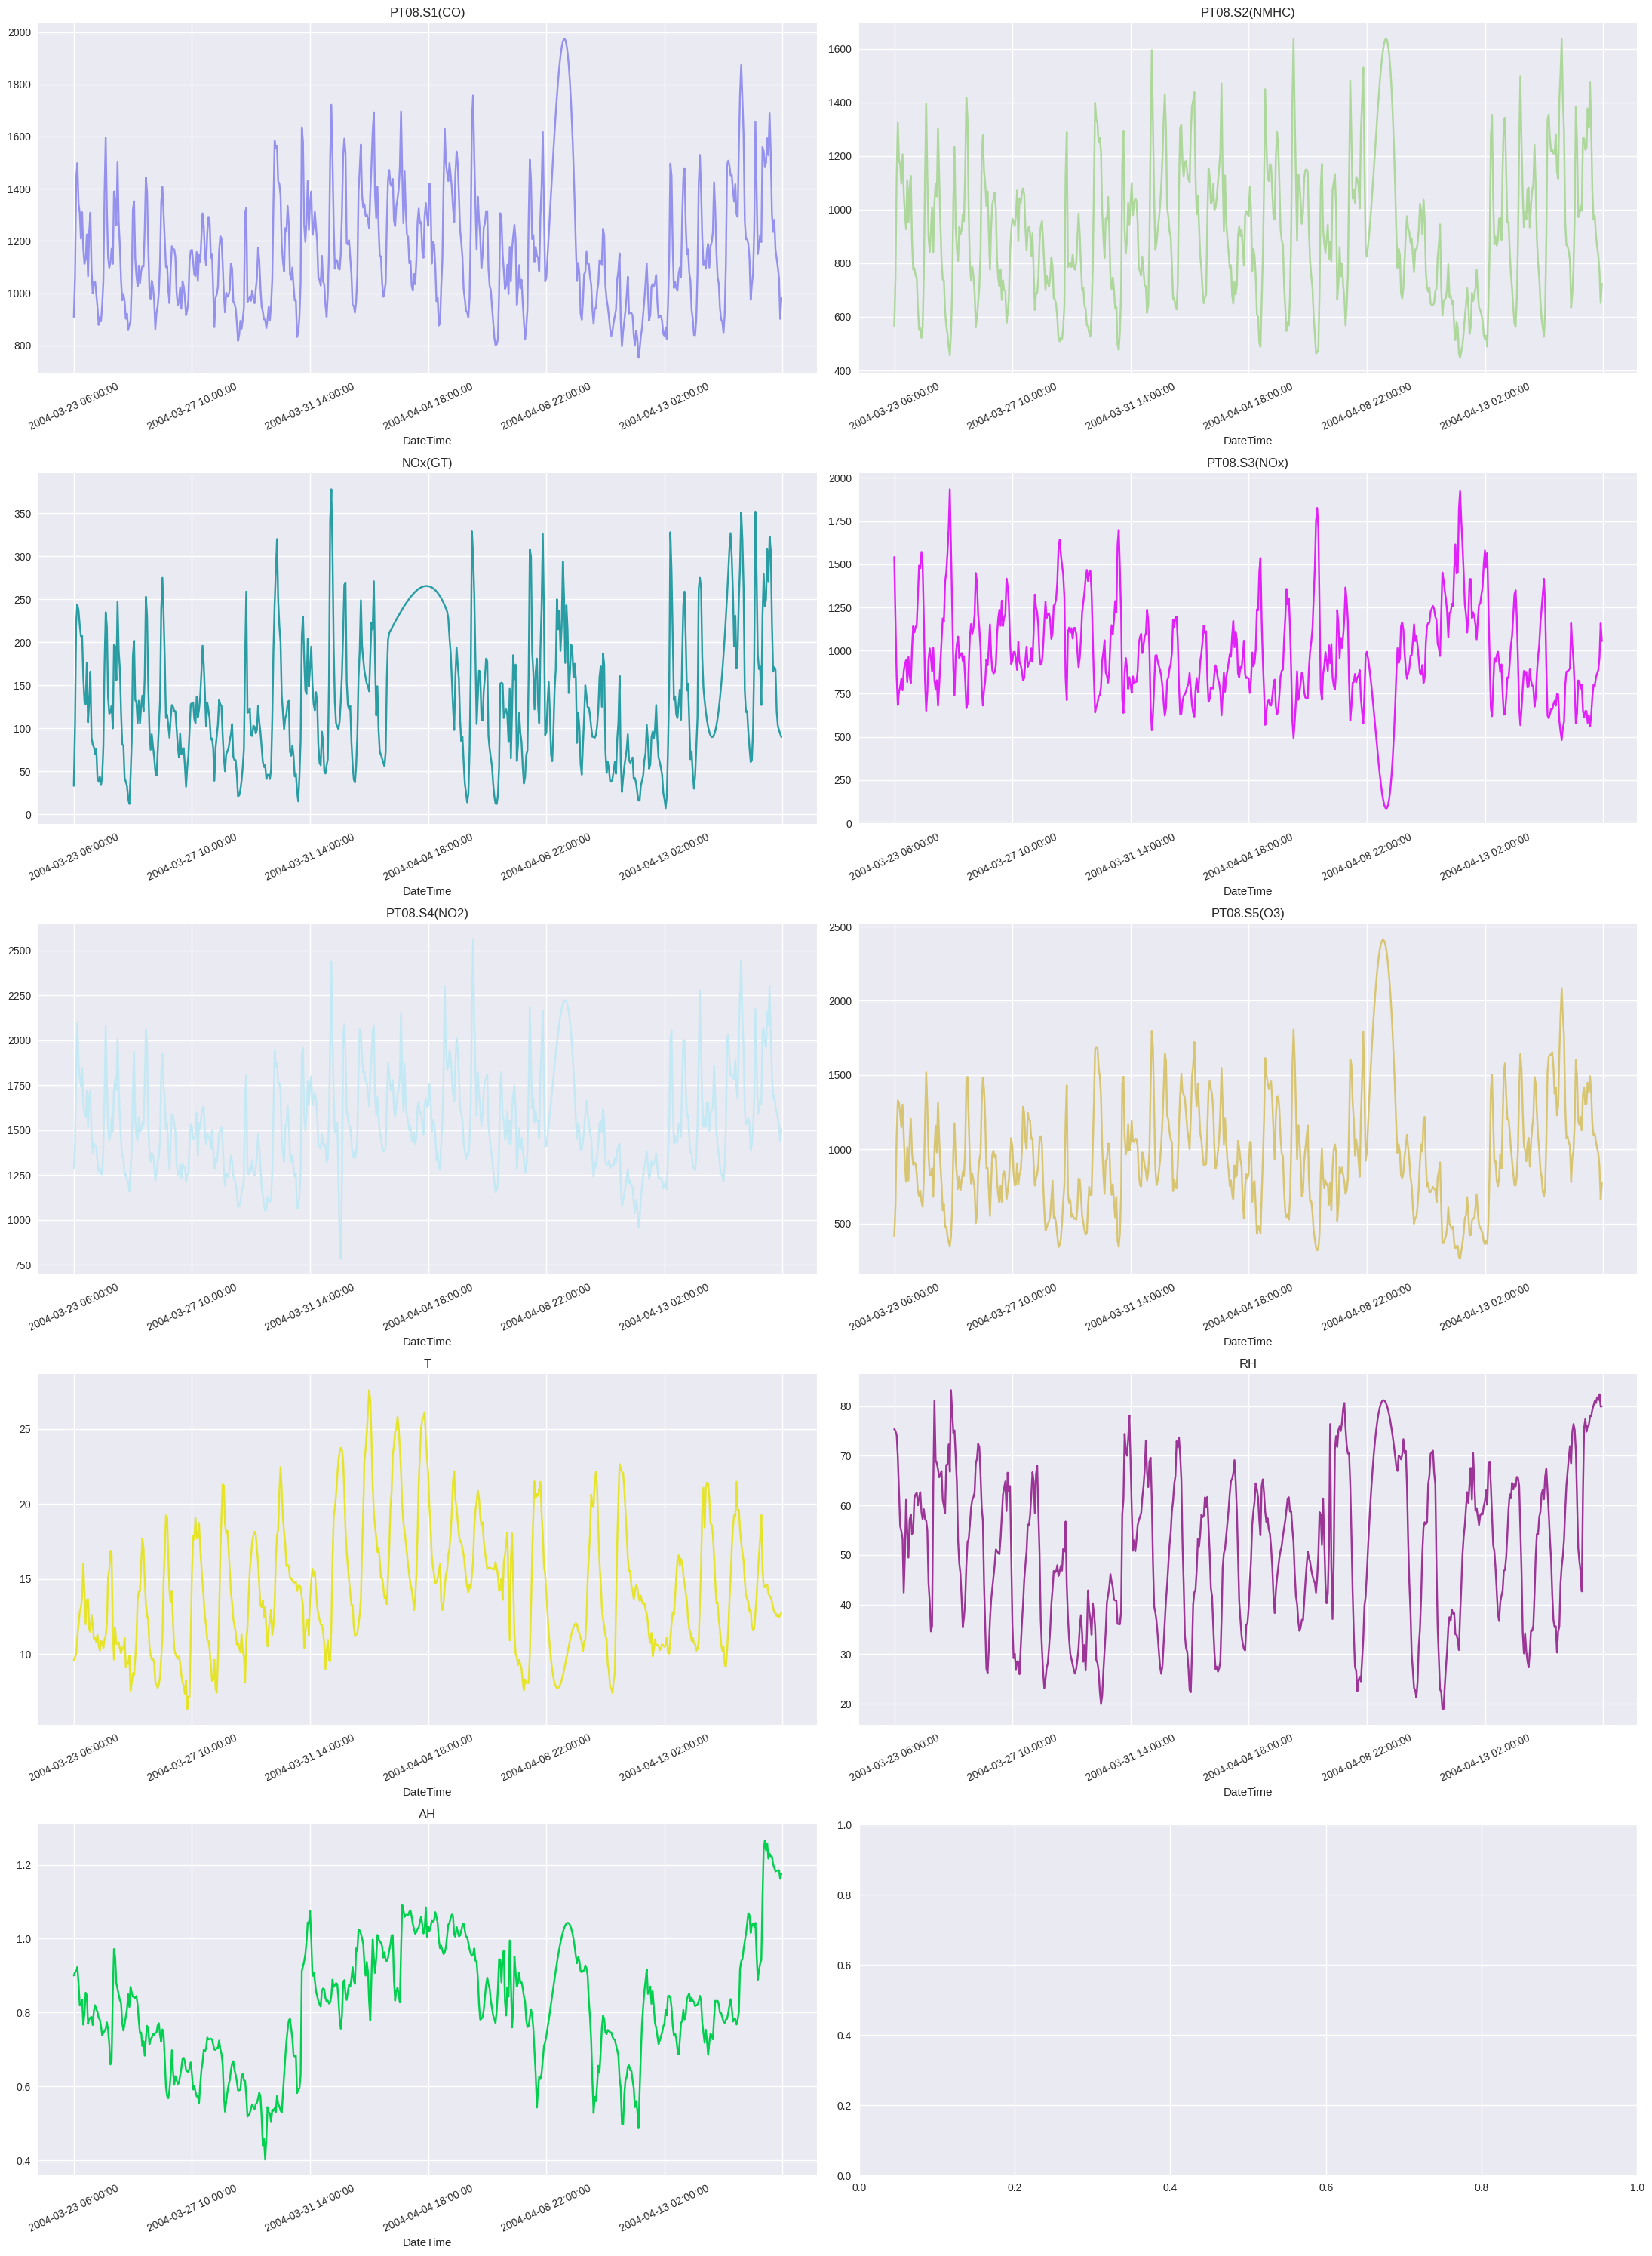

In [22]:
raw_visualization(df) #tail of data series


In [23]:
time_column = df.pop('DateTime')


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


data = df.copy()

X = df.copy()
# X = df.drop(['NOx(GT)'], axis=1)
y = df['NOx(GT)']

selector = SelectKBest(score_func=f_regression, k=5)
selected_features = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

selected_data = data.iloc[:, [2] + list(selected_indices)]

split = int(0.8 * len(selected_data))
train_data = selected_data[:split]
test_data = selected_data[split:] #.to_numpy()

scaler = StandardScaler()
scaler.fit(train_data)
normalized_train_data = scaler.transform(train_data)
normalized_test_data = scaler.transform(test_data)

time_steps = 20

def create_sequences(dtf, time_steps):
    sequences = []
    targets = []
    for i in range(len(dtf) - time_steps):
        sequences.append(dtf[i:i+time_steps])
        targets.append(dtf[i+time_steps])
    return np.array(sequences), np.array(targets)

x_train, y_train = create_sequences(normalized_train_data, time_steps)
x_test, y_test = create_sequences(normalized_test_data, time_steps)


print("Selected Features:", selected_data.columns)

Selected Features: Index(['NOx(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'PT08.S5(O3)'],
      dtype='object')


In [25]:
y_train.shape

(7465, 6)

**GRU**

In [26]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

In [27]:

early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
modelGRU = Sequential()
modelGRU.add(GRU(units=150, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelGRU.add(Dropout(0.2))
modelGRU.add(GRU(units=150, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelGRU.add(Dropout(0.2))
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelGRU.add(Dropout(0.2))
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelGRU.add(Dropout(0.2))
modelGRU.add(GRU(units=50, input_shape=(x_train.shape[1],6), activation='tanh'))
modelGRU.add(Dropout(0.2))
modelGRU.add(Dense(units=6))


In [28]:
modelGRU.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
modelGRU.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=50, batch_size=120,callbacks=[early_stopping])


Epoch 1/50
63/63 [==============================] - 21s 35ms/step - loss: 0.6969 - val_loss: 0.3671
Epoch 2/50
63/63 [==============================] - 1s 16ms/step - loss: 0.4495 - val_loss: 0.3094
Epoch 3/50
63/63 [==============================] - 1s 17ms/step - loss: 0.3511 - val_loss: 0.2370
Epoch 4/50
63/63 [==============================] - 1s 16ms/step - loss: 0.2908 - val_loss: 0.2086
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.2465 - val_loss: 0.1794
Epoch 6/50
63/63 [==============================] - 1s 12ms/step - loss: 0.2209 - val_loss: 0.1588
Epoch 7/50
63/63 [==============================] - 1s 12ms/step - loss: 0.1970 - val_loss: 0.1527
Epoch 8/50
63/63 [==============================] - 1s 12ms/step - loss: 0.1922 - val_loss: 0.1573
Epoch 9/50
63/63 [==============================] - 1s 12ms/step - loss: 0.1780 - val_loss: 0.1258
Epoch 10/50
63/63 [==============================] - 1s 12ms/step - loss: 0.1647 - val_loss: 0.1199
Epoch 11

In [29]:
pred_GRU= modelGRU.predict(x_test)

58/58 [==============================] - 2s 8ms/step


In [30]:
pred_GRU

array([[ 0.42209324,  0.22064167,  0.22766432,  0.41856176, -0.17708221,
         0.39567614],
       [ 0.53016275,  0.3473631 ,  0.40451032,  0.52043134, -0.31393322,
         0.5557693 ],
       [ 0.54224986,  0.16387483,  0.22890988,  0.5329252 , -0.21994045,
         0.43291843],
       ...,
       [ 0.3860639 ,  0.14544448, -0.05286786,  0.38886985, -0.26603693,
         0.23754817],
       [ 0.35388657,  0.17309915,  0.00327417,  0.35409236, -0.30108565,
         0.30234537],
       [ 0.21412241, -0.23665208, -0.3995968 ,  0.22067955, -0.02245529,
        -0.10615297]], dtype=float32)

In [31]:
y_test

array([[ 0.70143948,  0.30339047,  0.44923538,  0.70143948, -0.41059983,
         1.07491762],
       [ 0.42556215,  0.08858922,  0.29604327,  0.42556215, -0.35563735,
         0.78582875],
       [ 0.47072197,  0.14619875,  0.39839729,  0.47072197, -0.43030336,
         0.89200496],
       ...,
       [ 0.22334897,  0.0663684 ,  0.2045347 ,  0.22334897, -0.42874782,
         0.04500834],
       [ 0.15795666, -0.39286185, -0.07202451,  0.15795666, -0.22497182,
        -0.57708776],
       [ 0.19227365, -0.16818468,  0.16318639,  0.19227365, -0.32348948,
        -0.48780321]])

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test, pred_GRU)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, pred_GRU)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 0.07855391972451227
RMSE: 0.28027472187928804
MAE: 0.19759994151395185


**LSTM**

In [33]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],6), activation='tanh'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=50, input_shape=(x_train.shape[1],6), activation='tanh'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(units=6))

In [34]:
modelLSTM.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
modelLSTM.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=50, batch_size=120,callbacks=[early_stopping])
pred_LSTM = modelLSTM.predict(x_test)

Epoch 1/50
63/63 [==============================] - 12s 39ms/step - loss: 0.8973 - val_loss: 0.4652
Epoch 2/50
63/63 [==============================] - 1s 13ms/step - loss: 0.6960 - val_loss: 0.4392
Epoch 3/50
63/63 [==============================] - 1s 13ms/step - loss: 0.5938 - val_loss: 0.4120
Epoch 4/50
63/63 [==============================] - 1s 13ms/step - loss: 0.5191 - val_loss: 0.4485
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4585 - val_loss: 0.4006
Epoch 6/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4127 - val_loss: 0.3963
Epoch 7/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3817 - val_loss: 0.3790
Epoch 8/50
63/63 [==============================] - 1s 14ms/step - loss: 0.3449 - val_loss: 0.3826
Epoch 9/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3264 - val_loss: 0.4472
Epoch 10/50
63/63 [==============================] - 1s 15ms/step - loss: 0.3172 - val_loss: 0.4564
Epoch 11

In [35]:
mse = mean_squared_error(y_test, pred_LSTM)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, pred_LSTM)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 0.16546376620885453
RMSE: 0.40677237640829855
MAE: 0.2916727859154082


**CNN**

In [36]:
modelCNN = Sequential()
modelCNN.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],6)))
modelCNN.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Flatten())
modelCNN.add(Dense(50, activation='relu'))
modelCNN.add(Dense(units=6))

In [37]:
modelCNN.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
modelCNN.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=50, batch_size=120,callbacks=[early_stopping])
pred_CNN = modelCNN.predict(x_test)

Epoch 1/50
63/63 [==============================] - 5s 11ms/step - loss: 0.4663 - val_loss: 0.2714
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.2279 - val_loss: 0.2138
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1903 - val_loss: 0.2828
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1812 - val_loss: 0.2015
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1474 - val_loss: 0.1916
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1385 - val_loss: 0.1849
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1260 - val_loss: 0.1668
Epoch 8/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1200 - val_loss: 0.1686
Epoch 9/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1187 - val_loss: 0.1772
Epoch 10/50
63/63 [==============================] - 0s 5ms/step - loss: 0.1158 - val_loss: 0.1516
Epoch 11/50
63/63 

In [38]:
mse = mean_squared_error(y_test, pred_CNN)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, pred_CNN)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 0.13808196781219592
RMSE: 0.37159382100917115
MAE: 0.24135305669519766


In [39]:
modelGRU.save("airqualityGRU.keras")

In [40]:
modelLSTM.save("airqualityLSTM.keras")

In [41]:
modelCNN.save("airqualityCNN.keras")